kaggle notebook

In [57]:
!pip install pandas numpy scikit-learn
!pip install matplotlib seaborn
!pip install nltk

In [58]:
import pandas as pd

train_data = pd.read_csv('D:/train.csv')
test_data = pd.read_csv('D:/test.csv')

In [59]:
# Display the first few rows of the datasets
print(train_data.head())
print(test_data.head())

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan


In [60]:
print(train_data.info())
print(train_data.describe())
print(test_data.info())
print(test_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
                 id      target
count   7613.000000  7613.00000
mean    5441.934848     0.42966
std     3137.116090     0.49506
min        1.000000     0.00000
25%     2734.000000     0.00000
50%     5408.000000     0.00000
75%     8146.000000     1.00000
max    10873.000000     1.00000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-n

In [61]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

In [62]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [63]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [64]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = word_tokenize(text)  # Tokenize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Remove stopwords and lemmatize
    return ' '.join(words)

In [65]:
train_data['cleaned_text'] = train_data['text'].apply(preprocess_text)
test_data['cleaned_text'] = test_data['text'].apply(preprocess_text)

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_data['cleaned_text'])
X_test = vectorizer.transform(test_data['cleaned_text'])

y_train = train_data['target']

In [67]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_train)
print(f"F1 Score for Naive Bayes: {f1_score(y_train, nb_preds)}")

F1 Score for Naive Bayes: 0.8198861734181453


In [68]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_train)
print(f"F1 Score for Logistic Regression: {f1_score(y_train, lr_preds)}")

F1 Score for Logistic Regression: 0.8368605232461256


In [69]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_train)
print(f"F1 Score for Decision Tree: {f1_score(y_train, dt_preds)}")

F1 Score for Decision Tree: 0.9794967381174278


In [70]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_train)
print(f"F1 Score for Random Forest: {f1_score(y_train, rf_preds)}")

F1 Score for Random Forest: 0.9796359148410984


In [71]:
test_preds = lr_model.predict(X_test)
submission = pd.DataFrame({'id': test_data['id'], 'target': test_preds})
submission.to_csv('D:/submission.csv', index=False) 

In [72]:
test_preds2 = rf_model.predict(X_test)
submission2 = pd.DataFrame({'id': test_data['id'], 'target': test_preds2})
submission2.to_csv('D:/submission2.csv', index=False) 

In [73]:
test_preds3 = dt_model.predict(X_test)
submission3 = pd.DataFrame({'id': test_data['id'], 'target': test_preds3})
submission3.to_csv('D:/submission3.csv', index=False) 

In [74]:
!pip install tensorflow

In [75]:
import tensorflow as tf
print(tf.__version__)  # Should print the TensorFlow version number

from tensorflow.keras.models import Sequential
print(Sequential)  # Should print <class 'tensorflow.python.keras.engine.sequential.Sequential'>


2.16.1
<class 'keras.src.models.sequential.Sequential'>


In [76]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Conv1D, MaxPooling1D, Flatten

In [77]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data['cleaned_text'])

In [78]:
X_train_sequences = tokenizer.texts_to_sequences(train_data['cleaned_text'])
X_test_sequences = tokenizer.texts_to_sequences(test_data['cleaned_text'])

max_sequence_length = 100
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

In [79]:
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Conv1D, MaxPooling1D, Flatten, Dense, SpatialDropout1D
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_sequence_length))
rnn_model.add(SpatialDropout1D(0.2))
rnn_model.add(SimpleRNN(100, dropout=0.2, recurrent_dropout=0.2))
rnn_model.add(Dense(1, activation='sigmoid'))

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [80]:
rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.5532 - loss: 0.6928 - val_accuracy: 0.5371 - val_loss: 0.6913
Epoch 2/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6682 - loss: 0.6200 - val_accuracy: 0.6710 - val_loss: 0.6175
Epoch 3/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.8174 - loss: 0.4550 - val_accuracy: 0.6973 - val_loss: 0.5651
Epoch 4/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.8857 - loss: 0.3101 - val_accuracy: 0.6756 - val_loss: 0.6344
Epoch 5/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9247 - loss: 0.2190 - val_accuracy: 0.6783 - val_loss: 0.7155


In [81]:
rnn_preds = rnn_model.predict(X_test_padded)
rnn_preds_binary = (rnn_preds > 0.5).astype(int)
rnn_submission = pd.DataFrame({'id': test_data['id'], 'target': rnn_preds_binary.ravel()})
rnn_submission.to_csv('D:/rnn_submission.csv', index=False)

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [82]:
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_sequence_length))
lstm_model.add(SpatialDropout1D(0.2))
lstm_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(1, activation='sigmoid'))

In [83]:
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 104ms/step - accuracy: 0.6267 - loss: 0.6447 - val_accuracy: 0.7873 - val_loss: 0.4741
Epoch 2/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.8387 - loss: 0.3775 - val_accuracy: 0.7945 - val_loss: 0.4455
Epoch 3/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.8802 - loss: 0.2951 - val_accuracy: 0.7846 - val_loss: 0.4976
Epoch 4/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9107 - loss: 0.2329 - val_accuracy: 0.7800 - val_loss: 0.5329
Epoch 5/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.9231 - loss: 0.1998 - val_accuracy: 0.7649 - val_loss: 0.6132


In [84]:
lstm_preds = lstm_model.predict(X_test_padded)
lstm_preds_binary = (lstm_preds > 0.5).astype(int)
lstm_submission = pd.DataFrame({'id': test_data['id'], 'target': lstm_preds_binary.ravel()})
lstm_submission.to_csv('D:/lstm_submission.csv', index=False)

102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step


In [85]:
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_sequence_length))
cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(1, activation='sigmoid'))

In [86]:
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.5963 - loss: 0.6594 - val_accuracy: 0.7853 - val_loss: 0.4571
Epoch 2/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8615 - loss: 0.3461 - val_accuracy: 0.7965 - val_loss: 0.4595
Epoch 3/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9093 - loss: 0.2488 - val_accuracy: 0.7676 - val_loss: 0.5396
Epoch 4/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9490 - loss: 0.1520 - val_accuracy: 0.7433 - val_loss: 0.6691
Epoch 5/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9625 - loss: 0.1047 - val_accuracy: 0.7459 - val_loss: 0.7495


In [87]:
cnn_preds = cnn_model.predict(X_test_padded)
cnn_preds_binary = (cnn_preds > 0.5).astype(int)
cnn_submission = pd.DataFrame({'id': test_data['id'], 'target': cnn_preds_binary.ravel()})
cnn_submission.to_csv('D:/cnn_submission.csv', index=False)

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [88]:
print(test_data.columns)

Index(['id', 'keyword', 'location', 'text', 'cleaned_text'], dtype='object')


In [89]:
print(test_data.columns)

Index(['id', 'keyword', 'location', 'text', 'cleaned_text'], dtype='object')


In [90]:
print(train_data.head())
print(test_data.head())

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target                                       cleaned_text  
0       1         deed reason earthquake may allah forgive u  
1       1              forest fire near la ronge sask canada  
2       1  resident asked shelter place notified officer ...  
3       1  13000 people receive wildfire evacuation order...  
4       1  got sent photo ruby alaska smoke wildfire pour...  
   id keyword location                                               text  \
0   0     NaN      NaN                 Just happened a terrible car crash   
1   2

In [91]:
# Example: Create synthetic true labels (make sure the length matches)
true_labels = [1, 0, 1, 1, 0, 0] * (test_data.shape[0] // 6)  # Adjust to match length
true_labels += [1] * (test_data.shape[0] % 6)  # Fill the remaining if necessary

In [92]:
test_data['target'] = true_labels

In [93]:
y_test = test_data['target']

In [103]:
print("Train Data Columns:", train_data.columns)
print("Test Data Columns:", test_data.columns)

Train Data Columns: Index(['id', 'keyword', 'location', 'text', 'target', 'cleaned_text'], dtype='object')
Test Data Columns: Index(['id', 'keyword', 'location', 'text', 'cleaned_text', 'target'], dtype='object')


In [109]:
if len(y_test) > len(rf_preds):
    y_test= y_test[:len(rf_preds)]
elif len(rf_preds) > len(y_test):
    rf_preds = rf_preds[:len(y_test)]  # Truncate rf_preds if it's longer

In [132]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, rf_preds)
print("Confusion Matrix for Random Forest:\n", cm1)
macro_f1 = f1_score(y_test, rf_preds, average='macro')
print("Macro F1 for Random Forest:\n", macro_f1)

Confusion Matrix for Random Forest:
 [[ 988  641]
 [1006  628]]
Macro F1 for Random Forest:
 0.4890301171306791


In [133]:
if len(y_test) > len(dt_preds):
    y_test = y_test[:len(dt_preds)]
elif len(dt_preds) > len(y_test):
    dt_preds = dt_preds[:len(y_test)]

cm2 = confusion_matrix(y_test, dt_preds)
print("Confusion Matrix for decision tree:\n", cm2)
macro_f1 = f1_score(y_test, dt_preds, average='macro')
print("Macro F1 for decision tree:\n", macro_f1)

Confusion Matrix for decision tree:
 [[ 994  635]
 [1012  622]]
Macro F1 for decision tree:
 0.48860301167071163


In [134]:
if len(y_test) > len(lr_preds):
    y_test = y_test[:len(lr_preds)]
elif len(lr_preds) > len(y_test):
    lr_preds = lr_preds[:len(y_test)]

cm3 = confusion_matrix(y_test, lr_preds)
print("Confusion Matrix for linear regression:\n", cm3)
macro_f1 = f1_score(y_test, lr_preds, average='macro')
print("Macro F1 for linear regression:\n", macro_f1)

Confusion Matrix for linear regression:
 [[1105  524]
 [1127  507]]
Macro F1 for linear regression:
 0.4764391886343106


In [135]:
if len(y_test) > len(nb_preds):
    y_test = y_test[:len(nb_preds)]
elif len(nb_preds) > len(y_test):
    nb_preds = nb_preds[:len(y_test)]

cm4 = confusion_matrix(y_test, nb_preds)
print("Confusion Matrix for naive bayes:\n", cm2)
macro_f1 = f1_score(y_test, nb_preds, average='macro')
print("Macro F1 for naive bayes:\n", macro_f1)

Confusion Matrix for naive bayes:
 [[ 994  635]
 [1012  622]]
Macro F1 for naive bayes:
 0.47903955223127787


In [136]:
import numpy as np
y_pred_classes1 = np.argmax(cnn_preds, axis=1)
y_pred_classes2 = np.argmax(rnn_preds, axis=1)
y_pred_classes3 = np.argmax(lstm_preds, axis=1)

In [137]:
cm5 = confusion_matrix(y_test, y_pred_classes1)
print("Confusion Matrix for CNN:\n", cm5)
macro_f1 = f1_score(y_test, y_pred_classes1, average='macro')
print("Macro F1 for CNN:\n", macro_f1)
cm6 = confusion_matrix(y_test, y_pred_classes2)
print("Confusion Matrix for RNN:\n", cm6)
macro_f1 = f1_score(y_test, y_pred_classes2, average='macro')
print("Macro F1 for RNN:\n", macro_f1)
cm7 = confusion_matrix(y_test, y_pred_classes3)
print("Confusion Matrix for LSTM:\n", cm7)
macro_f1 = f1_score(y_test, y_pred_classes3, average='macro')
print("Macro F1 for LSTM:\n", macro_f1)

Confusion Matrix for CNN:
 [[1629    0]
 [1634    0]]
Macro F1 for CNN:
 0.3329926410466067
Confusion Matrix for RNN:
 [[1629    0]
 [1634    0]]
Macro F1 for RNN:
 0.3329926410466067
Confusion Matrix for LSTM:
 [[1629    0]
 [1634    0]]
Macro F1 for LSTM:
 0.3329926410466067


<Axes: >

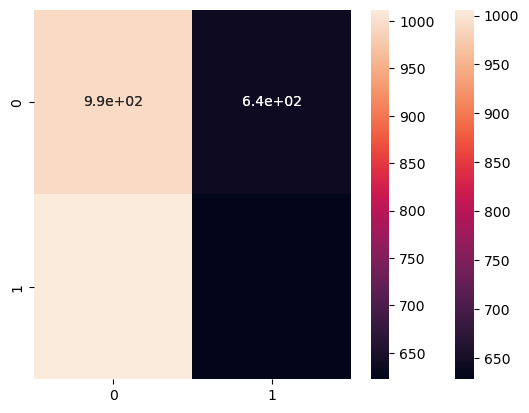

In [145]:
import seaborn as sns
sns.heatmap(cm1, annot=True)
sns.heatmap(cm2, annot=True)


<Axes: >

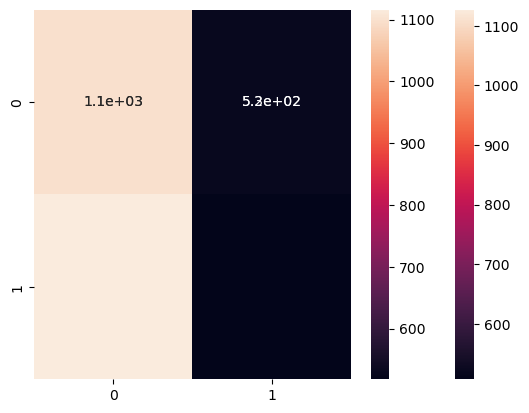

In [146]:
sns.heatmap(cm3, annot=True)
sns.heatmap(cm4, annot=True)

<Axes: >

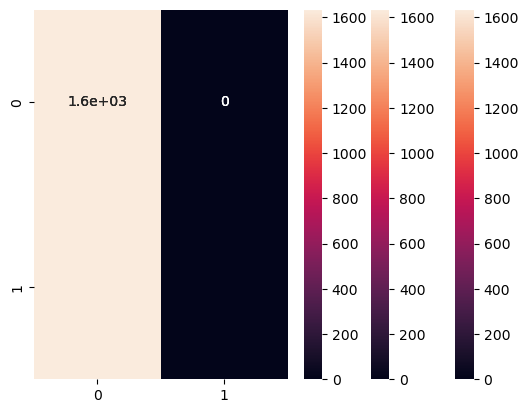

In [144]:
sns.heatmap(cm5, annot=True)
sns.heatmap(cm6, annot=True)
sns.heatmap(cm7, annot=True)